In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

### Ejercicio 2:  El movimiento del caballo y su distribución estadística.

El tablero de ajedrez está conformado por 8 filas y 8 columnas que forman 64 casillas iguales llamadas escaques.  
El caballo se mueve dos casillas en dirección horizontal o vertical y después una casilla más en ángulo recto.  
Eso implica que, desde una casilla central, el caballo puede acceder a 8 escaques diferentes.   
      
      
1. Escribir una función que determine de forma aleatoria la posición inicial del caballo en un tablero de $N\times N$ escaques. 
   
   Para el caso de un tablero de $8\times 8$, representar dicha posición por medio de una matriz $A$ cuyos elementos sean todos cero excepto aquel que corresponda a la posicion inicial del caballo, que se indicará por un 1.

In [2]:
def starting_position(N):
    """Generates a NxN array of zeros and a single 1 in a random position.
    
    Args:
        N (int): dimension of the array

    Returns:
        np.array: numpy array of zeros with a random 1.
    """
    assert(type(N) == int)
    row, column = rd.randrange(0, N), rd.randrange(0, N)
    A = np.zeros([N, N])
    A[row, column] = 1
    return A

starting_position(8)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
A = starting_position(8)
print(A)

np.unravel_index(np.argmax(A), A.shape)[0]

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


np.int64(0)

2. Escribir un programa que, dada una posición inicial para el caballo en un tablero $N\times N$, determine todos sus ${\bf posibles}$  movimientos y escoja aleatoriamente uno de ellos.  
   Representar dicho movimiento en un tablero $8\times 8$ añadiendo un uno a la matriz $A$ en dicha posición.
   
   
   


In [ ]:
def random_move(A, starting_row = .1, starting_column  = .1, index = False):
    """Takes a matrix that represents a chess board of different dimensions with zeros and a 1 in the starting position of
    a knight and returns an array of the same dimension with another 1 in one of the posible squares that the knight can
    move to.

    Args:
        matrix (np.array): array with the movement of a chess knight.
        starting_row (float, optional): if given, it's used for following moves as starting row position. Must be
                                        integer. Defaults to 0.1.
        starting_column (float, optional): if given, it's used for following moves as starting column position. Must
                                           be integer. Defaults to 0.1.
        index (bool, optional): determines whether the user wants the matrix or the coordinates of the random move
                                Defaults to False.

    Returns:
        np.array: array with the starting position and a random move added to the corresponding position.
        or
        tuple: position of the final move.
    """
    matrix = A.copy()
    N = np.shape(matrix)[0]
    if type(starting_row) != int and type(starting_column) != int:
        starting_row, starting_column = np.unravel_index(np.argmax(matrix), matrix.shape)
    else:
        assert(0 <= starting_row < N)
        assert(0 <= starting_column < N)
                
    two_random_squares = [-2, 2]
    one_random_square = [-1, 1]
    
    possible_moves = []
    row, column = starting_row, starting_column
    
    # First move through rows.
    for move1 in two_random_squares:
        row += move1
        if 0 <= row < N:
            for move2 in one_random_square:
                column += move2
                if 0 <= column < N:
                    possible_moves.append((int(row), int(column)))
                column = starting_column
        row  = starting_row
        
    # First move through columns:
    for move1 in two_random_squares:
        column += move1
        if 0 <= column < N:
            for move2 in one_random_square:
                row += move2
                if 0 <= row < N:
                    possible_moves.append((int(row), int(column)))
                row = starting_row
        column = starting_column

    # Choose random move:
    final_move = possible_moves[rd.randrange(0, len(possible_moves))]
    matrix[final_move[0], final_move[1]] += 1
    if not index:
        return matrix
    else:
        return final_move

In [21]:
A = starting_position(8)
print(A)

random_move(A)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

3. Escribir un programa que, dada una posición aleatoria inicial, contabilice el número de veces que un caballo ha pasado por cada escaque de un tablero $N\times N$ después de haber realizado $M$ movimientos.
    
   Representar el número de veces que un caballo ha pasado por cada escaque en un tablero $8\times 8$ después de haber realizado 10000 movimientos. 
   
   [Ayuda: usar una matriz cuyos elementos indiquen el número de veces que el caballo ha pasado por cada escaque]. 
   
   


In [35]:
def moves(M, N = 8):
    """Takes the number of moves a chess knight has to make and returns an array with the number of times the 
    knight starting in the highest value position has gone through each square. Each move is randomly picked among
    all the possible moves.

    Args:
        M (np.array): array with the count of every time the kinght has moved to each position.
        N (int, optional): array (board) size. Defaults to 8.

    Returns:
        np.array: array with numbers from 0 to M representing every time the knight has been to each square.
    """
    matrix = starting_position(N)
    sr, sc = np.unravel_index(np.argmax(matrix), matrix.shape)
    for _ in range(M):
        sr, sc = random_move(matrix, starting_row=sr, starting_column=sc, index = True)
        move = np.zeros([N, N])
        move[sr, sc] = 1
        matrix += move
    return matrix

moves(10000)

array([[ 51., 105., 127., 135., 114., 118.,  91.,  64.],
       [ 95., 139., 166., 188., 209., 184., 120.,  99.],
       [127., 160., 252., 250., 225., 219., 220., 126.],
       [109., 156., 227., 251., 221., 247., 195., 105.],
       [104., 183., 229., 241., 230., 247., 154., 145.],
       [112., 168., 238., 240., 255., 245., 129., 124.],
       [ 91., 101., 167., 180., 167., 193., 132.,  89.],
       [ 63.,  92., 112., 117., 108., 110.,  85.,  55.]])

4. Escribir una función que, para un tablero de dimensión $N$ y $M$ movimientos del caballo, represente en una lista de $N^2$ elementos la frecuencia relativa del número de veces que un caballo ha pasado por cada escaque.

    Representarlo para un tablero $8\times 8$ y 10000 movimientos. 

    Comprobar que el resultado no depende de la posición inicial de partida y estimar cualitativamente el número de movimientos necesaris $M$ para que la distribución no dependa de $M$.

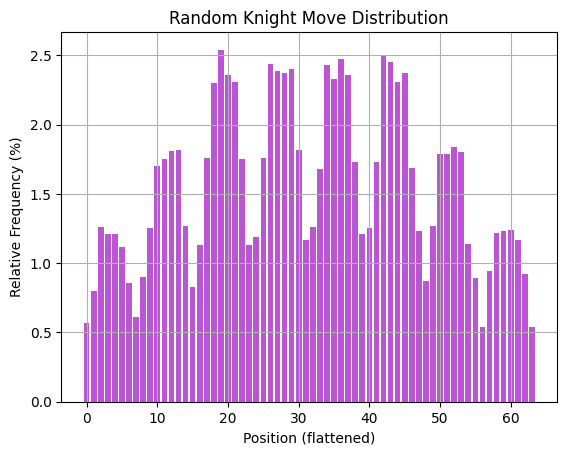

In [36]:
def knight_distribution(M, N = 8, bars = False):
    """Returns the distribution of M moves a chess knight has randomly donde on an NxN size board.

    Args:
        M (int): number of moves
        N (int, optional): array (board) size. Defaults to 8.
        bars (bool, optional): determines whether the user wants the graph of the distribution or not.
                                Defaults to False.

    Returns:
        list: list of relative frequencies for each square of the board.
    """
    matrix = moves(M)
    relative_frequencies, positions = [], []
    for i in range(N):
        for j in range(N):
            relative_frequencies.append(round(100*matrix[i, j]/(M + 1), 2))
            positions.append((i, j))
    relative_frequencies = np.round(100*matrix/(M+1), 2)
    if bars:
        plt.bar(np.arange(N*N), relative_frequencies.flatten(), color = 'mediumorchid')
        plt.xlabel("Position (flattened)")
        plt.ylabel("Relative Frequency (%)")
        plt.title("Random Knight Move Distribution")
        plt.grid()
        plt.show()
    return relative_frequencies

f = knight_distribution(100000, bars=True)

5. Para entender mejor el resultado, representar ahora la frecuencia relativa del número de veces que el caballo ha pasado por cada escaque en un tablero $8\times 8$ y 10000 movimientos en una gráfica bidimensional asociada al tablero de ajedrez. 

   ¿Qué esta ocurriendo? ¿Cómo se explica entonces el resultado observado en el apartado anterior?.  
   
   
 


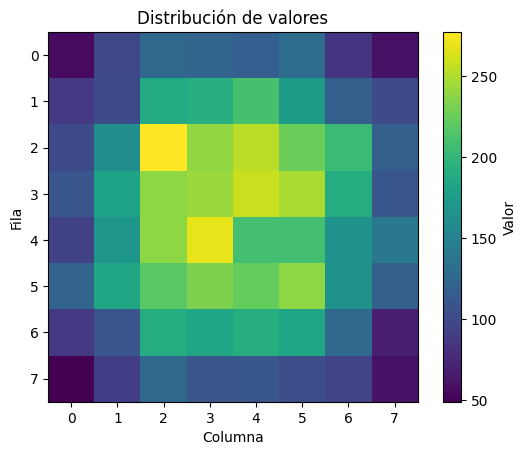

In [37]:
matrix = moves(10000)
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Valor')
plt.title("Distribución de valores")
plt.xlabel("Columna")
plt.ylabel("Fila")
plt.show()